In [1]:
# Import das Bibliotecas:
import numpy
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from datetime import datetime
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc

## Coordenadas de Observação

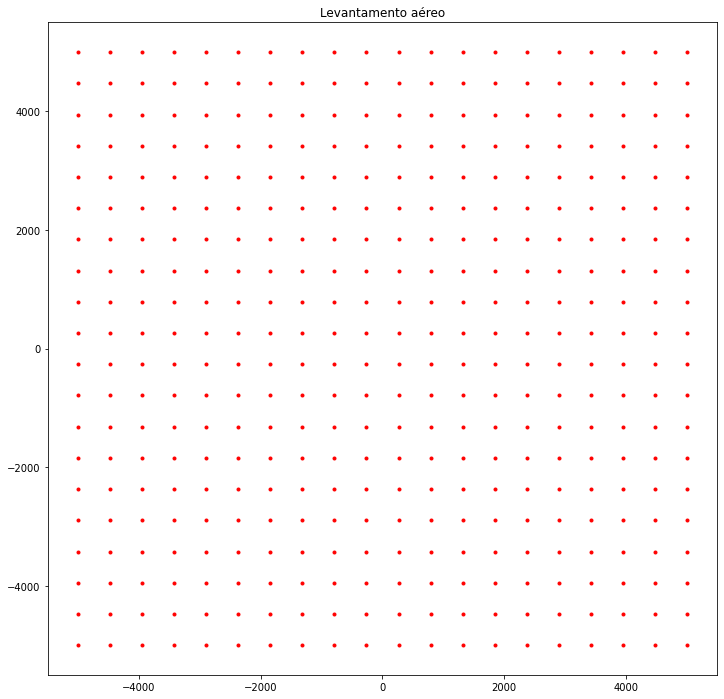

In [10]:
nx = 20 # n de observacoes na direcao x
ny = 20 # n de observacoes na direcao y
size = (nx, ny)

xmin = -5000.0 # KM
xmax = +5000.0 # KM
ymin = -5000.0 # KM
ymax = +5000.0 # KM
z = -50.0 #altura de voo, (com Z constante) em metros

dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**dicionario)

## Coordenadas do Dique

In [11]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-500.0, 500.0) 
y1,y2  = (-2500.0, 2500.0)
z1,z2  = (200, 4000.0)   # z eh positivo para baixo!
deltaz = 0.0
deltay = 0.0
deltax = 0.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'merg': y,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)

../modules/plot_3D.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if merg == 'y':


../modules/plot_3D.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure.gca(projection = '3d')
../modules/plot_3D.py:55: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


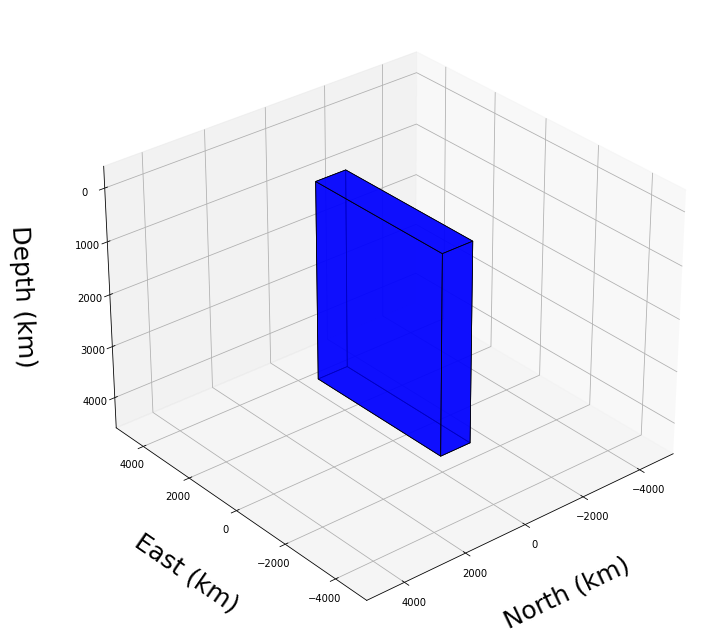

In [12]:
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

vert1 =  plot_3D.vert_point(dic1)

color = 'b'
size = [9, 10]
view = [210,130]

prism_1 = plot_3D.plot_prism(vert1, color)

prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

## Parâmetros do campo geomagnético Regional

In [20]:
I = 5.0    # inclinacao do campo principal em graus
D = 70.0      # declinacao do campo principal em graus
Fi = 23000.0 # Intensidade do campo principal (nT)

# Campo principal variando com as posicao F(X,Y):
F = Fi + 0.053*X + 0.08*Y # nT

# Calculo das componentes cartesianas do versor F:

# conversao de graus para radiandos:
incl = numpy.deg2rad(I)
decl = numpy.deg2rad(D)
#-----------------------------------
Fx = numpy.cos(incl)*numpy.cos(decl)
Fy = numpy.cos(incl)*numpy.sin(decl)
Fz = numpy.sin(incl)

# Etapa 4: Calculo do Campo total:
CT =  numpy.sqrt((F*Fx)**2 + (F*Fy)**2 + (F*Fz)**2)

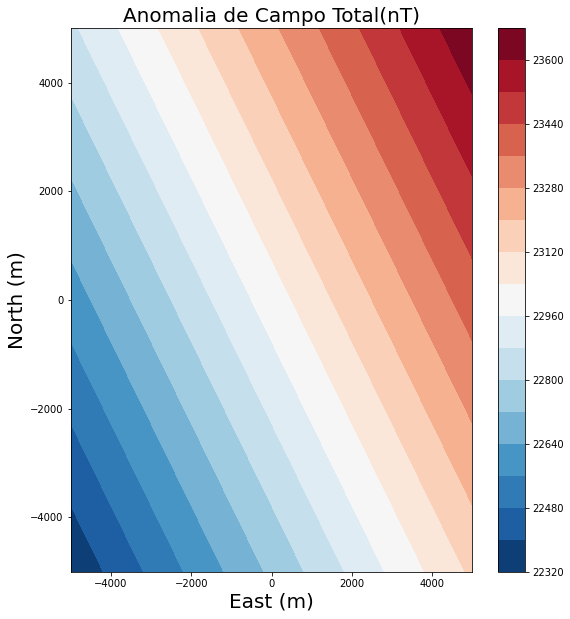

In [21]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, CT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


## Parâmetros da fonte

In [22]:
# Propriedades magneticas da fonte crustal:
inc = 0.0 # magnetizacao puramente induzida
dec = 0.0 
Mi  = 2.0 # intensidade da magnetizacao em A/m
fonte_crustal_mag1 = [pointx[0], pointx[1], 
                     pointy[0], pointy[1],
                     pointz[0], pointz[1], Mi]

## Cálculo da anomalia da fonte

In [23]:
tfa1 = prism.prism_tf(X, Y,z, fonte_crustal_mag1, I, D, inc, dec)

In [24]:
mi = 0.0
sigma = 5.0

#ACTn = noise.noise_gaussiana(t, mi, sigma, ACT)
tfa_final = auxiliars.noise_normal_dist(tfa1, mi, sigma)

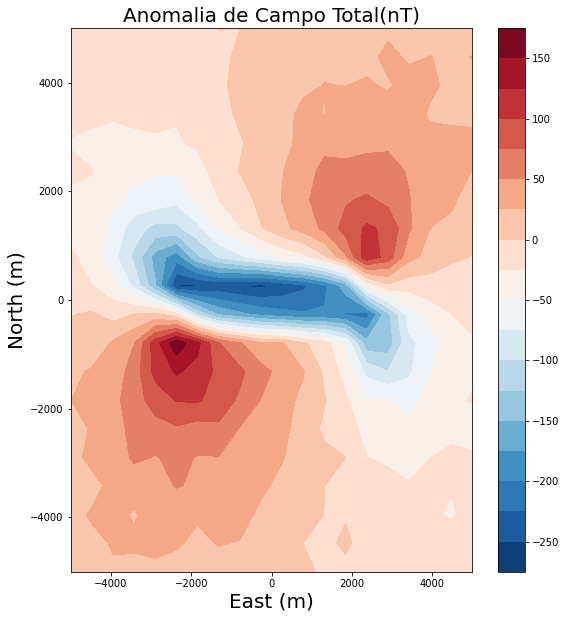

In [25]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


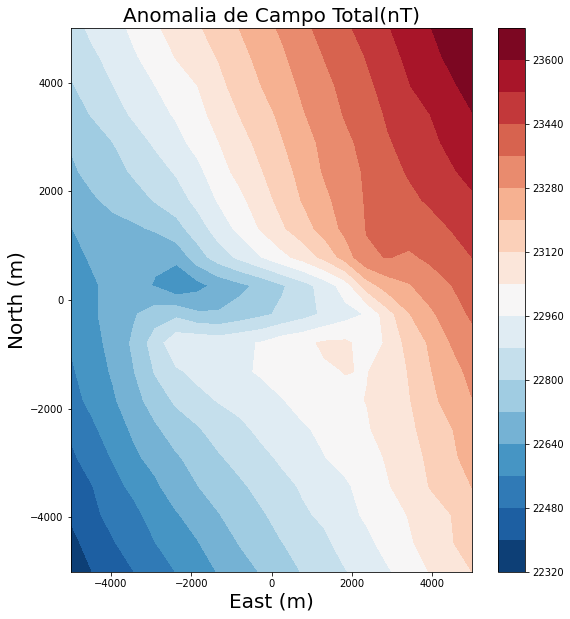

In [26]:
ACT = tfa_final + CT

%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [10]:
dici1 = {'nx': nx,
         'ny': ny,
         'X': X,
         'Y': Y,
         'Z': Z,
         'ACTn': tfa_final
                  }

data_e_hora_atuais = datetime.now()
data_e_hora = data_e_hora_atuais.strftime('%d_%m_%Y_%H_%M')

dicionario = {'Data da Modelagem': data_e_hora,
              'Tipo de Modelagem': 'Modelagem de prisma',
              'números de corpos': 1,
              'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [pointx[0], pointx[1], pointy[0], pointy[1], pointz[0], pointz[1]],
              'inclinação': 'positivo',
              'Informação da fonte (Mag, Incl, Decl)': [Mi, inc, dec],
              'Informação regional (Camp.Geomag, Incl, Decl)': [I, D]}

print(dicionario)

Data_f = salve_doc.reshape_matrix(**dici1)

{'Data da Modelagem': '22_02_2021_12_36', 'Tipo de Modelagem': 'Modelagem de prisma', 'números de corpos': 1, 'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [-0.5, 0.5, -2.5, 2.5, 0.2, 4.0], 'inclinação': 'positivo', 'Informação da fonte (Mag, Incl, Decl)': [2.0, 0.0, 0.0], 'Informação regional (Camp.Geomag, Incl, Decl)': [5.0, 70.0]}


In [11]:
Data_f

,North(m),East(m),Altura de voo(m),Anomalia Magnética(nT)
0,-5.000000,-5.0,-0.05,11.449487
1,-4.473684,-5.0,-0.05,12.580535
2,-3.947368,-5.0,-0.05,18.225855
3,-3.421053,-5.0,-0.05,24.937648
4,-2.894737,-5.0,-0.05,18.954122
...,...,...,...,...
395,2.894737,5.0,-0.05,19.254207
396,3.421053,5.0,-0.05,21.342067
397,3.947368,5.0,-0.05,10.126672
398,4.473684,5.0,-0.05,7.592560


In [12]:
#salve_doc.create_diretorio(dicionario, Data_f)

In [ ]:
#data_cubo = pd.read_table('Logfile/27_10_2020_13_21/pop_final.csv', sep =',')

In [ ]:
#print(data_cubo)